<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 画像処理

In [0]:
# 必要なライブラリの読み込み
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

In [0]:
# データセットのダウンロード
# 2回目以降は実行する必要はありません
from urllib import request

# trainデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/train.pickle'
request.urlretrieve(url, 'train.pickle')

# testデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/test.pickle'
request.urlretrieve(url, 'test.pickle')

# ラベルデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/label.pickle'
request.urlretrieve(url, 'label.pickle')

('label.pickle', <http.client.HTTPMessage at 0x7fb493b558d0>)

In [0]:
# pickleのサンプルプログラム
import pickle

# 適当なオブジェクトを用意
obj = '保存されるオブジェクトです'

# Pythonオブジェクトをpickleファイルとして保存
with open('sample.pickle','wb') as f:
    pickle.dump(obj, f) # (Pythonオブジェクト, pickleファイル)

# pickleファイルをPythonオブジェクトとして読込
with open('sample.pickle','rb') as f:
    loaded_obj = pickle.load(f)  # (pickleファイル)

# 読み込んだオブジェクトを確認
print(loaded_obj)

保存されるオブジェクトです


In [0]:
# pickle形式のファイルを読み込む関数
# (保存されたpickleファイル)

def unpickle(file):
    # 保存されたpickleファイルを読み込み
    # 'rb'は｢読み込み専用(r)｣かつ｢バイト列(b)｣を意味する
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

In [0]:
# データの読み込みを実行
train = unpickle('train.pickle')
test = unpickle('test.pickle')
label = unpickle('label.pickle')

In [0]:
# trainデータの型を確認
print(type(train))
print(type(test))
print(type(label))

<class 'dict'>
<class 'dict'>
<class 'list'>


In [0]:
# クラスラベルを確認
label

['clock', 'cup', 'bicycle', 'television', 'chair']

In [0]:
# データを変数に格納
X_train = train['data']
y_train = train['label']
X_test = test['data']
y_test = test['label']

In [0]:
# サンプル数を確認
N_train = len(X_train)  
N_test = len(X_test)

print(N_train, N_test)

2500 500


In [0]:
# 画像サイズを確認
# (サンプル数, チャンネル数, 縦のピクセル数, 横のピクセル数)
print(X_train.shape)
print(X_test.shape)

(2500, 3, 32, 32)
(500, 3, 32, 32)


In [0]:
# (サンプル数, channel, height, width)を(サンプル数, height, width, channel)に変換
X_train = X_train.transpose([0, 2, 3, 1])
X_test = X_test.transpose([0, 2, 3, 1])

In [0]:
#Kerasに入力するためにyをOne-Hot表現に変換
#（例：[1, 0, 2] -> [[0, 1, 0],[1, 0, 0],[0, 0, 1]])
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

In [0]:
# 正規化処理
X_train /= 255.0
X_test /= 255.0

In [0]:
# trainデータのサンプルについて情報を確認する関数
# (trainデータのindex)
def show_train_sample_info(index):
    img = X_train[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
    # 正解ラベルを出力
    print('class: ' + label[y_train[index]])
    print('label: ' + str(y_train[index]))

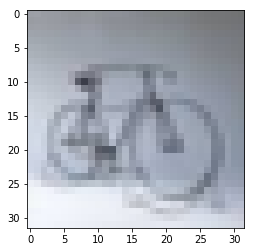

class: bicycle
label: 2


In [0]:
# trainデータのサンプルについて情報を確認
# 引数のindexを変えていろいろな画像を出力してみましょう
show_train_sample_info(1300)

# CNNの実装

In [0]:
import keras
# 層構造のモデルを定義するためのメソッド
from keras.models import Sequential
# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# モデルの定義

#-----------
# CNNモデル
#-----------

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(32, 32, 3), kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

W0622 16:10:57.895824 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 16:10:57.957366 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 16:10:57.966357 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 16:10:58.011044 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# 同様に学習前にコンパイルします。
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01), # 学習率を0.01に指定
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 500

# epoch数を指定
n_epoch = 30

W0622 16:29:32.387684 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0622 16:29:32.401012 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# 学習を開始します。
hist = model.fit(X_train,
                 Y_train,
                 epochs=n_epoch,
                 validation_data=(X_test, Y_test),
                 verbose=1,
                 batch_size=batch_size)

W0622 16:29:50.795730 140414126036864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0622 16:29:50.871745 140414126036864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 2500 samples, validate on 500 samples
Epoch 1/30
2500/2500 [==============================] - 23s 9ms/step - loss: 1.6170 - acc: 0.2412 - val_loss: 1.6082 - val_acc: 0.2560
Epoch 2/30
2500/2500 [==============================] - 22s 9ms/step - loss: 1.6054 - acc: 0.2464 - val_loss: 1.6005 - val_acc: 0.2460
Epoch 3/30
2500/2500 [==============================] - 22s 9ms/step - loss: 1.5990 - acc: 0.2820 - val_loss: 1.5954 - val_acc: 0.2980
Epoch 4/30
2500/2500 [==============================] - 23s 9ms/step - loss: 1.5944 - acc: 0.2664 - val_loss: 1.5916 - val_acc: 0.2660
Epoch 5/30
2500/2500 [==============================] - 23s 9ms/step - loss: 1.5908 - acc: 0.2488 - val_loss: 1.5882 - val_acc: 0.2440
Epoch 6/30
2500/2500 [==============================] - 22s 9ms/step - loss: 1.5879 - acc: 0.2428 - val_loss: 1.5852 - val_acc: 0.2360
Epoch 7/30
2500/2500 [==============================] - 23s 9ms/step - loss: 1.5850 - acc: 0.2400 - val_loss: 1.5824 - val_acc: 0.2400
Epoch 8/

In [0]:
# 性能指標を確認
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, model.predict(X_test).argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))

accuracy: 0.354
recall: 0.354
precision: 0.424
f1_score: 0.295


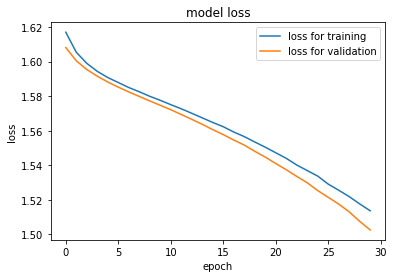

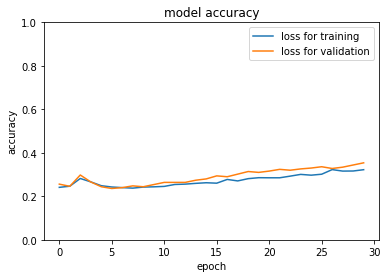

In [0]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

In [0]:
# testデータのサンプルについて情報を確認する関数
# (testデータのindex)
def show_test_sample_info(index):
    img = X_test[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
    # 正解ラベルを出力
    print('class: ' + label[y_test[index]])
    print('label: ' + str(y_test[index]))

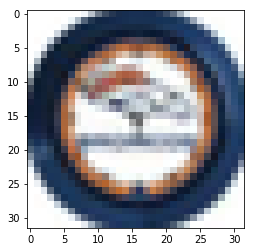

class: clock
label: 0
predict: 0
正解です｡


In [0]:
# indexを指定
index = 0

# 画像を出力
show_test_sample_info(index)

# 指定のindexが与えられたtestデータについて確認
pred = model.predict(X_test[index].reshape(1, 32, 32, 3)).argmax()
print('predict: {}'.format(pred))

# 正解か不正解かを出力
if pred == y_test[index]:
    print('正解です｡')
else:
    print('間違いです｡')

# 混合行列の出力

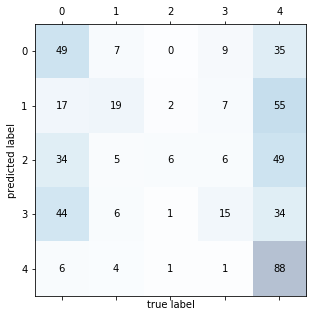

In [0]:
from sklearn.metrics import confusion_matrix as cm

# 混同行列きれいに出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 5, 1))                               
    plt.yticks(np.arange(0, 5, 1))  
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
# 混同行列を出力
result = model.predict(X_test).argmax(axis=1)
plot_cm(y_test, result)

In [0]:
# ラベルを確認
print(label)

['clock', 'cup', 'bicycle', 'television', 'chair']


In [0]:
# 予測が外れたtestデータを格納するリストを用意
errors = []

# すべてのtestデータをチェック
for i in range(len(y_test)):
    pred_1 = model.predict(X_test[i].reshape(1, 32, 32, 3)).argmax()
    if pred_1 != y_test[i]:
        # (index, 正解ラベル, 予測ラベル)をタプル形式で格納
        errors.append((i, label[y_test[i]], label[pred_1]))

In [0]:
# 誤分類の総数を出力
len(errors)

323

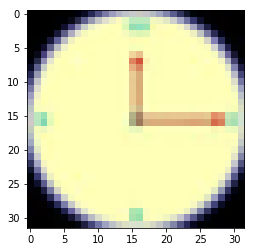

class: clock
label: 0
clock
chair


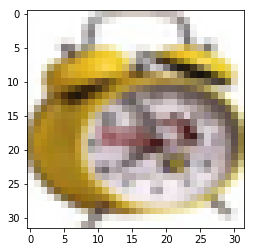

class: clock
label: 0
clock
chair


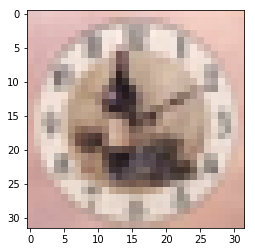

class: clock
label: 0
clock
chair


In [0]:
# 予測が外れた画像を集めて表示する
# 数が多いので3つだけ表示
for error_index, corr_label, pred_label in errors[:3]:
    show_test_sample_info(error_index)
    print(corr_label)
    print(pred_label)

# いろいろなニューラルネットワーク


In [0]:
def AlexNet(ROWS=32, COLS=32):
    model = Sequential()

    # 第1畳み込み層
    model.add(conv2d(96, 11, strides=(4,4), bias_init=0, input_shape=(ROWS, COLS, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # 第２畳み込み層
    model.add(conv2d(256, 5, bias_init=1))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # 第３−５畳み込み層
    model.add(conv2d(384, 3, bias_init=0))
    model.add(conv2d(384, 3, bias_init=1))
    model.add(conv2d(256, 3, bias_init=1))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # 密結合層
    model.add(Flatten())
    model.add(dense(4096))
    model.add(Dropout(0.5))
    model.add(dense(4096))
    model.add(Dropout(0.5))

    # 読み出し層
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
from keras import regularizers
from keras.layers.convolutional import ZeroPadding2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout, AveragePooling2D, merge

def inception_module(x, params, concat_axis,
                     subsample=(1, 1), activation='relu',
                     border_mode='same', weight_decay=None):

    (branch1, branch2, branch3, branch4) = params

    if weight_decay:
        W_regularizer = regularizers.l2(weight_decay)
        b_regularizer = regularizers.l2(weight_decay)
    else:
        W_regularizer = None
        b_regularizer = None

    pathway1 = Conv2D(branch1[0], 1, 1,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False)(x)

    
    pathway2 = Conv2D(branch2[0], 1, 1,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False)(x)
    pathway2 = Conv2D(branch2[1], 3, 3,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False)(pathway2)

    
    pathway3 = Conv2D(branch3[0], 1, 1,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False)(x)
    pathway3 = Conv2D(branch3[1], 5, 5,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False)(pathway3)

    
    pathway4 = MaxPooling2D(pool_size=(1, 1))(x)
    pathway4 = Conv2D(branch4[0], 1, 1,
                             subsample=subsample,
                             activation=activation,
                             border_mode=border_mode,
                             W_regularizer=W_regularizer,
                             b_regularizer=b_regularizer,
                             bias=False,
                             )(pathway4)

    return merge([pathway1, pathway2, pathway3, pathway4],
                 mode='concat', concat_axis=concat_axis)
  
#Model
def GoogleNet(ROWS=277, COLS=277):
    input = keras.layers.Input(shape=(ROWS, COLS, 3))
    x = Conv2D(64, input_shape=(ROWS, COLS, 3),
                 kernel_size=(7, 7),
                 strides=(1, 1))(input)
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(3, 3))(x)
    x = Conv2D(64, kernel_size=(1, 1))(x)
    x = Conv2D(192, kernel_size=(3, 3), strides=(1, 1))(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(3, 3))(x)

    CONCAT_AXIS = 3
    x = inception_module(x, params=[(64, ), (96, 128), (16, 32), (32, )],
                     concat_axis=CONCAT_AXIS)
    x = inception_module(x, params=[(128,), (128, 192), (32, 96), (64, )],
                     concat_axis=CONCAT_AXIS)

    x = MaxPool2D(pool_size=(1, 1), strides=(1, 1))(x)
    x = ZeroPadding2D(padding=(1, 1))(x)

    x = inception_module(x, params=[(192,), (96, 208), (16, 48), (64, )],
                     concat_axis=CONCAT_AXIS)

    
    x = inception_module(x, params=[(160,), (112, 224), (24, 64), (64, )],
                     concat_axis=CONCAT_AXIS)
    x = inception_module(x, params=[(128,), (128, 256), (24, 64), (64, )],
                     concat_axis=CONCAT_AXIS)
    x = inception_module(x, params=[(112,), (144, 288), (32, 64), (64, )],
                     concat_axis=CONCAT_AXIS)

    
    x = inception_module(x, params=[(256,), (160, 320), (32, 128), (128,)],
                     concat_axis=CONCAT_AXIS)
    x = MaxPool2D(pool_size=(1, 1), strides=(1, 1))(x)

    x = inception_module(x, params=[(256,), (160, 320), (32, 128), (128,)],
                     concat_axis=CONCAT_AXIS)
    x = inception_module(x, params=[(384,), (192, 384), (48, 128), (128,)],
                     concat_axis=CONCAT_AXIS)

    x = AveragePooling2D(pool_size=(7, 7), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000)(x)
    x = Activation('linear')(x)
    x = Dense(1000)(x)
    x = Activation('softmax')(x)
    
    model = keras.models.Model(inputs=input, outputs=x)
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [0]:
import os
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions, preprocess_input, _obtain_input_shape

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16(include_top=True, weights='imagenet',
          input_tensor=None, input_shape=None,
          pooling=None,
          classes=1000):

    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # モデル作成
    model = Model(inputs, x, name='vgg16')

    # 重り読み込み
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    file_hash='64373286793e3c8b2b4e3219cbf3544b')
        else:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    file_hash='6d6bbae143d832006294945121d1f1fc')
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':
            if include_top:
                maxpool = model.get_layer(name='block5_pool')
                shape = maxpool.output_shape[1:]
                dense = model.get_layer(name='fc1')
                layer_utils.convert_dense_weights_data_format(dense, shape, 'channels_first')

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    elif weights is not None:
        model.load_weights(weights)

        
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
import six
from keras.models import Model
from keras.layers import Input, Activation, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K


def _bn_relu(input):

    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)


def _conv_bn_relu(**conv_params):
    
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        conv = Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f


def _bn_relu_conv(**conv_params):
    
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(activation)

    return f


def _shortcut(input, residual):
    
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

    return add([shortcut, residual])


def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    
    def f(input):
        for i in range(repetitions):
            init_strides = (1, 1)
            if i == 0 and not is_first_layer:
                init_strides = (2, 2)
            input = block_function(filters=filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
        return input

    return f


def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = Conv2D(filters=filters, kernel_size=(3, 3),
                           strides=init_strides,
                           padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
        return _shortcut(input, residual)

    return f


def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    
    def f(input):

        if is_first_block_of_first_layer:
            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),
                              strides=init_strides,
                              padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=l2(1e-4))(input)
        else:
            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),
                                     strides=init_strides)(input)

        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)
        residual = _bn_relu_conv(filters=filters * 4, kernel_size=(1, 1))(conv_3_3)
        return _shortcut(input, residual)

    return f


def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_dim_ordering() == 'tf':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier


class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions):
        
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[1], input_shape[2], input_shape[0])

        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)
        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)
        pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)

        block = pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)
            filters *= 2

        block = _bn_relu(block)

        
        block_shape = K.int_shape(block)
        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),
                                 strides=(1, 1))(block)
        flatten1 = Flatten()(pool2)
        dense = Dense(units=num_outputs, kernel_initializer="he_normal",
                      activation="softmax")(flatten1)

        model = Model(inputs=input, outputs=dense)
        model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2, 2])

    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_101(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 23, 3])

    @staticmethod
    def build_resnet_152(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 8, 36, 3])